In [62]:
# Gym
import gym
import gym_anytrading
import base64

# Stable baselines 1.15
#TODO look at adding the rest if/as needed
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, SAC, ACER, PPO2, TD3
# from stable_baselines import DDPG, GAIL

# tf 
import tensorflow as tf

# core
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/AAPL.csv')
df.head()


,date,open,high,low,Close,vol,MACD_Signal,MACD_Hist,MACD,Real Upper Band,Real Lower Band,Real Middle Band,RSI,SMA,SMA.1,ROC,CCI,DX,crossover
0,2015-01-02,111.39,111.44,107.350,24.859222,53204626.0,0.0331,-0.0662,-0.0331,26.4382,24.4203,25.4293,43.3753,25.4722,25.2811,-4.2200,-1.2375,1.0230,False
1,2015-01-05,108.29,108.65,105.410,24.158898,64285491.0,0.0005,-0.1305,-0.1300,26.4006,24.2478,25.3242,37.1471,25.1203,25.1997,-7.2952,-39.5183,4.1662,False
2,2015-01-06,106.54,107.43,104.630,24.161172,65797116.0,-0.0405,-0.1638,-0.2043,26.3446,24.1051,25.2248,37.1785,24.7724,25.1471,-7.4518,-51.0223,5.3946,False
3,2015-01-07,107.20,108.20,106.695,24.499965,40105934.0,-0.0790,-0.1541,-0.2332,26.3233,24.0206,25.1720,41.8158,24.5554,25.1399,-5.6242,-32.8844,4.0556,False
4,2015-01-08,109.23,112.15,108.700,25.441309,59364547.0,-0.0988,-0.0792,-0.1780,26.2498,24.0434,25.1466,52.2985,24.6241,25.2179,-1.8810,14.4123,2.4124,False


In [3]:

env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [4]:
env.signal_features

array([[ 2.48592221e+01,  0.00000000e+00],
       [ 2.41588982e+01, -7.00323827e-01],
       [ 2.41611720e+01,  2.27377870e-03],
       [ 2.44999650e+01,  3.38793020e-01],
       [ 2.54413094e+01,  9.41344364e-01],
       [ 2.54685948e+01,  2.72853439e-02],
       [ 2.48410318e+01, -6.27562910e-01],
       [ 2.50615884e+01,  2.20556530e-01],
       [ 2.49660897e+01, -9.54987037e-02],
       [ 2.42885036e+01, -6.77586040e-01],
       [ 2.40997800e+01, -1.88723629e-01],
       [ 2.47205216e+01,  6.20741574e-01],
       [ 2.49092452e+01,  1.88723629e-01],
       [ 2.55572721e+01,  6.48026918e-01],
       [ 2.56891513e+01,  1.31879162e-01],
       [ 2.57164366e+01,  2.72853439e-02],
       [ 2.48160203e+01, -9.00416349e-01],
       [ 2.62189417e+01,  1.40292143e+00],
       [ 2.70352282e+01,  8.16286538e-01],
       [ 2.66395908e+01, -3.95637487e-01],
       [ 2.69738362e+01,  3.34245463e-01],
       [ 2.69783838e+01,  4.54755730e-03],
       [ 2.71852976e+01,  2.06913858e-01],
       [ 2.

In [5]:
env.action_space

Discrete(2)

info {'total_reward': -3.9857409229999945, 'total_profit': 0.4347170879944392, 'position': 0}


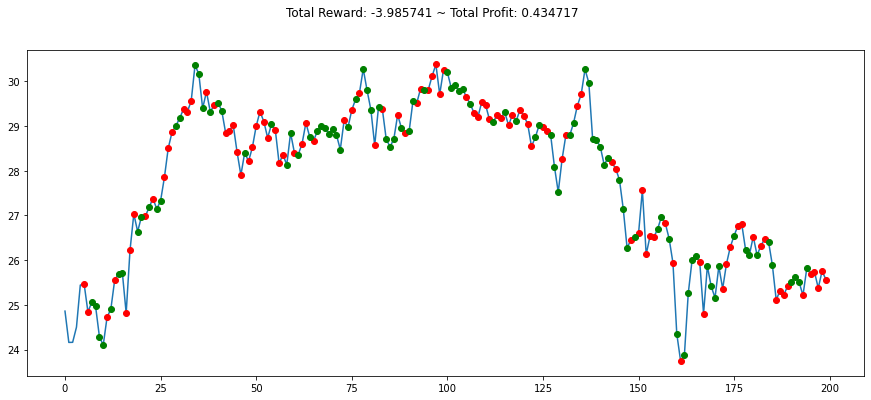

In [6]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()





In [7]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [8]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=50000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.178   |
| fps                | 19       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.0232   |
---------------------------------
---------------------------------
| explained_variance | -0.00366 |
| fps                | 422      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 0.639    |
---------------------------------
---------------------------------
| explained_variance | -0.33    |
| fps                | 494     

KeyboardInterrupt: 

In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


info {'total_reward': 0.5501196049999955, 'total_profit': 0.9588389794792253, 'position': 1}


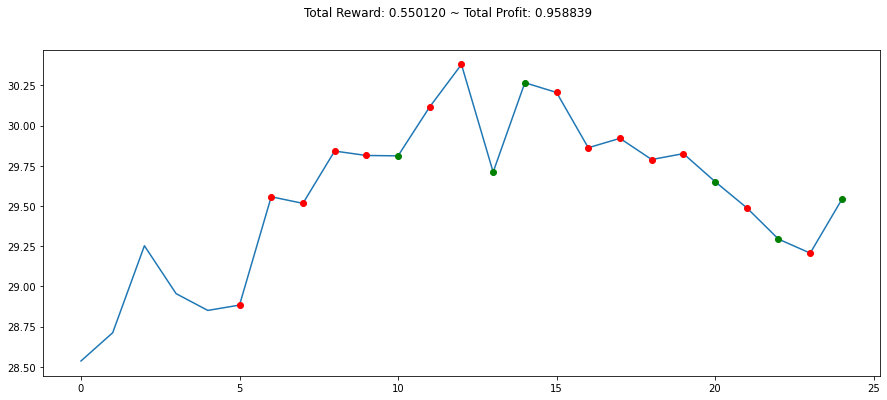

In [10]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [11]:
model.save("a2c_cartpole")

In [ ]:
image_filename = 'hope.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

In [ ]:
del model

In [ ]:
def f():
    model = A2C.load("a2c_cartpole")
    env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
    obs = env.reset()
    while True: 
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)    
        if done:
            #print("info", info)
            break
    plt.figure(figsize=(15,6))
    plt.cla()
    env.render_all()
    #ax = plt.gca()
    return plt.show()

In [ ]:
f()

Loading a model without an environment, this model cannot be trained until it has a valid environment.


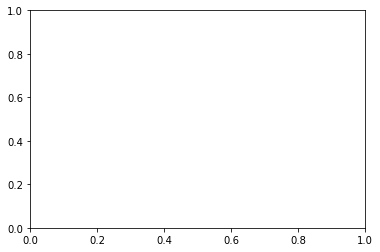

In [12]:
model = A2C.load("a2c_cartpole")
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)    
    if done:
        #print("info", info)
        break
        
ax = plt.gca()

In [14]:
import quantstats as qs

In [15]:


df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])



In [16]:


policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=1000)



---------------------------------
| explained_variance | -0.00419 |
| fps                | 20       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 6.31     |
---------------------------------
---------------------------------
| explained_variance | 0.00689  |
| fps                | 361      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 4.03     |
---------------------------------
---------------------------------
| explained_variance | 0.0107   |
| fps                | 412      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 4.25     |
---------------------------------


In [18]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 538.7762740000014, 'total_profit': 0.00030289420503972105, 'position': 1}


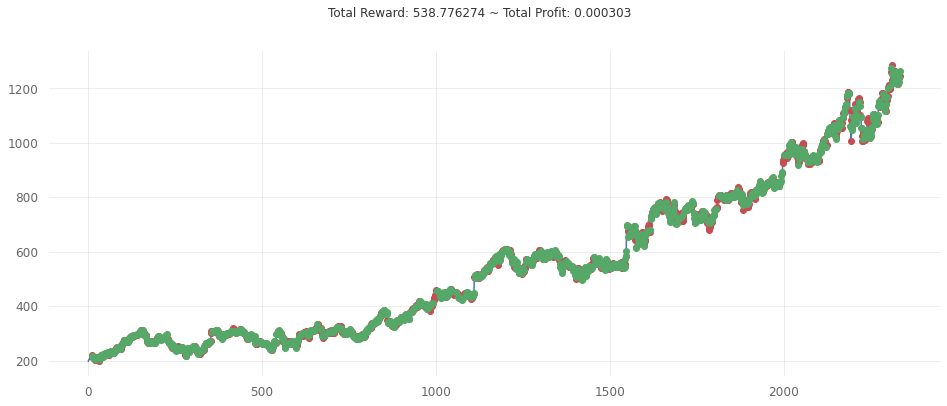

In [60]:


plt.figure(figsize=(16, 6))
env.render_all()
plt.savefig('hope.png')

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             26.0%

Cumulative Return          -99.97%
CAGR%                      -58.45%
Sharpe                     -4.29
Sortino                    -4.69
Max Drawdown               -99.97%
Longest DD Days            3358
Volatility (ann.)          19.97%
Calmar                     -0.58
Skew                       -0.0
Kurtosis                   35.32

Expected Daily %           -0.35%
Expected Monthly %         -7.04%
Expected Yearly %          -55.52%
Kelly Criterion            -92.03%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.41%
Expected Shortfall (cVaR)  -2.41%

Payoff Ratio               0.73
Profit Factor              0.17
Common Sense Ratio         0.0
CPC Index                  0.02
Tail Ratio                 0.0
Outlier Win Ratio          20.19
Outlier Loss Ratio

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-06-19,2018-08-20,2018-08-29,3358,-99.969175,-99.965746


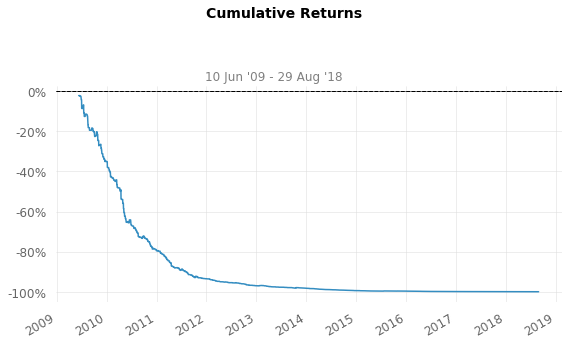

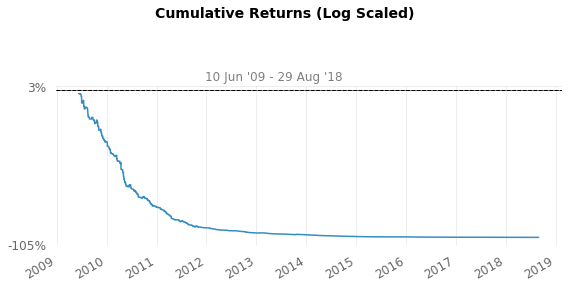

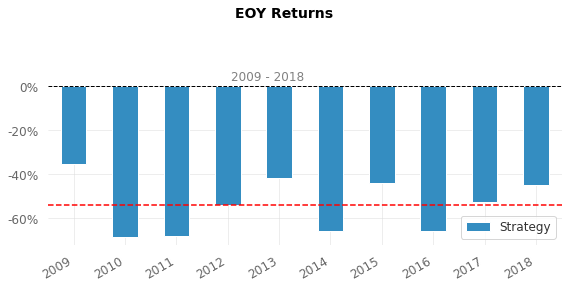

/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


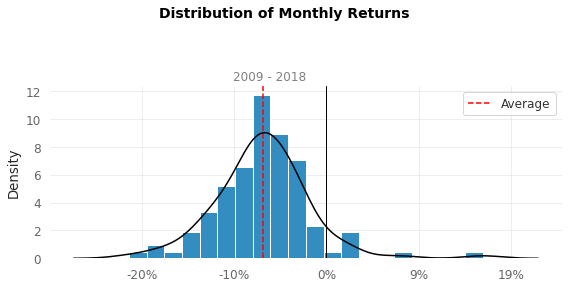

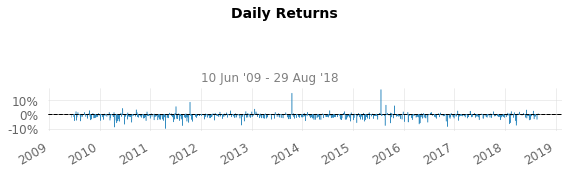

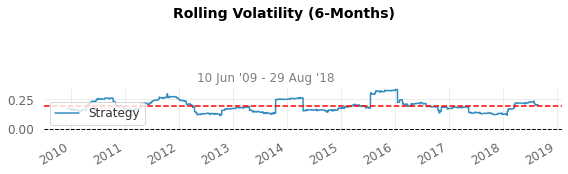

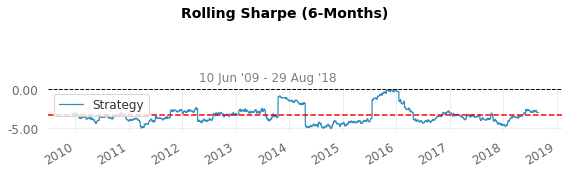

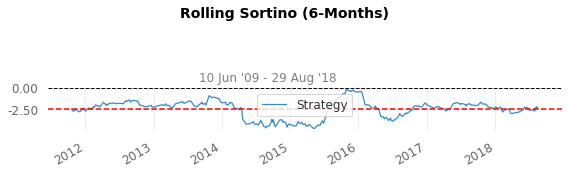

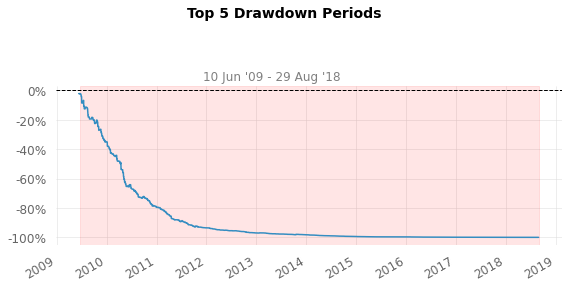

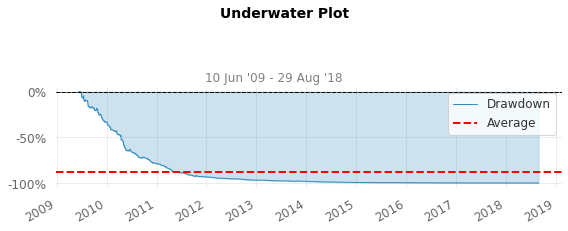

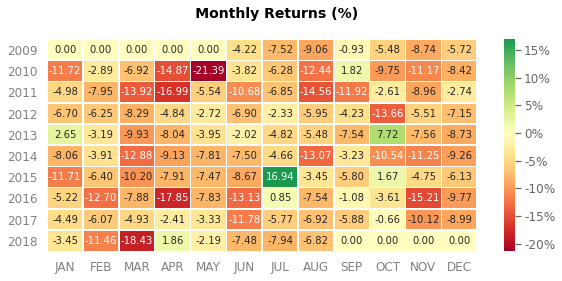

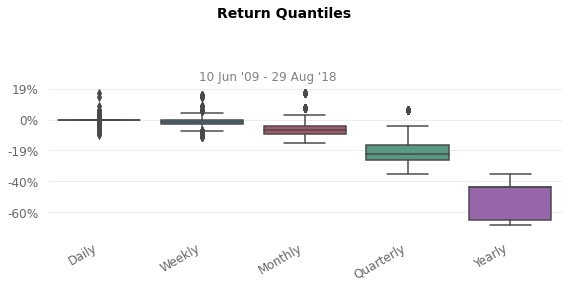

/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [56]:


qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')


In [26]:
qs.reports.html(returns, output='a2c_quantstats.html')

/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [36]:
net_worth

Date
2009-06-09    1.000000
2009-06-10    0.978221
2009-06-11    0.978221
2009-06-12    0.978221
2009-06-15    0.978221
                ...   
2018-08-23    0.000302
2018-08-24    0.000302
2018-08-27    0.000302
2018-08-28    0.000303
2018-08-29    0.000303
Length: 2324, dtype: float64

In [37]:
returns

Date
2009-06-10   -0.021779
2009-06-11    0.000000
2009-06-12    0.000000
2009-06-15    0.000000
2009-06-16    0.000000
                ...   
2018-08-23    0.000000
2018-08-24    0.000000
2018-08-27    0.000000
2018-08-28    0.004489
2018-08-29    0.000000
Length: 2323, dtype: float64

/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/quantstats/utils.py:330: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  portfolio.loc[:1, :] = start_balance


TypeError: cannot convert the series to <class 'float'>

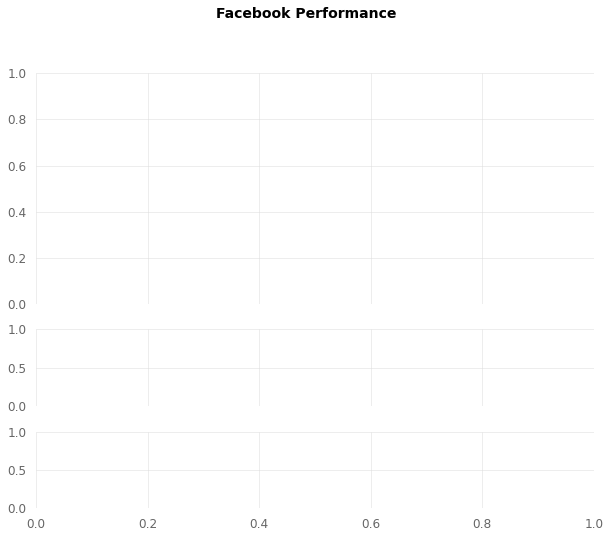

In [40]:
qs.plots.snapshot(df, title='Facebook Performance')

In [ ]:
line.get_xdata()

In [43]:
line.get_ydata()

NameError: name 'line' is not defined

In [44]:
stock = qs.utils.download_returns('FB')

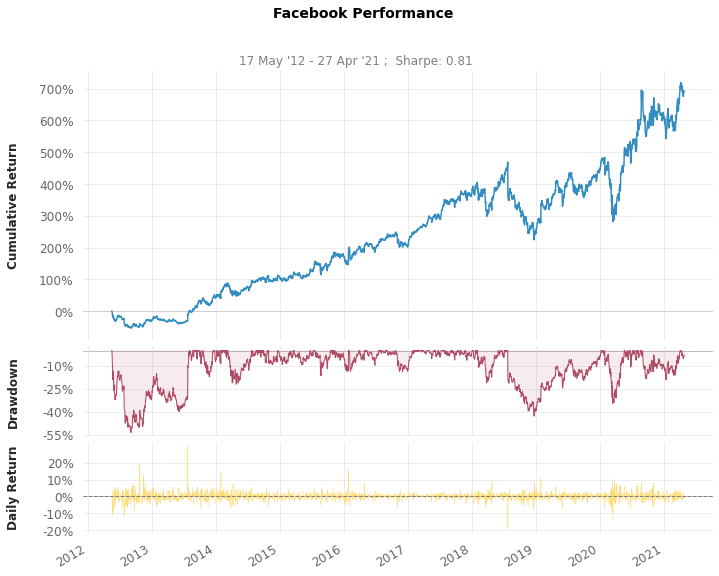

In [47]:
qs.plots.snapshot(stock, title='Facebook Performance').save

In [48]:
qs.reports.html(stock, "SPY", output='report.html')

/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


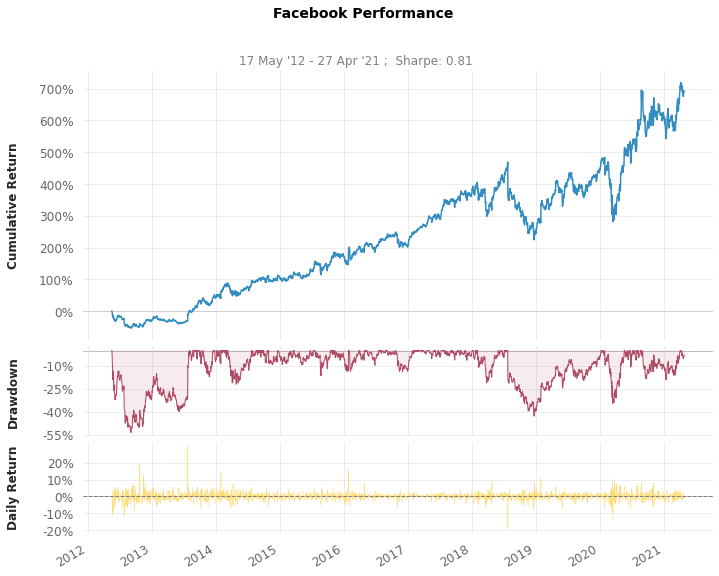

AttributeError: 'NoneType' object has no attribute 'savefigure'

In [59]:
qs.plots.snapshot(stock, title='Facebook Performance').savefigure('saved_figure.png')
plt.savefig('nadia.png')

In [ ]:
help(env)

In [ ]:


import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt



In [ ]:


policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=1000)



In [ ]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

In [ ]:


plt.figure(figsize=(16, 6))
env.render_all()
plt.show()



In [ ]:
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

In [ ]:
import matplotlib.pyplot as plt, mpld3

In [ ]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.show()

In [ ]:
z = mpld3.enable_notebook()

In [ ]:
mpld3.figure()

In [ ]:
plt.figure()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interactive legend', size=20)

    html_str = mpld3.fig_to_html(fig)
    Html_file= open("index.html","w")
    Html_file.write(html_str)
    Html_file.close()

In [ ]:
type(Html_file)

In [ ]:
html_str

In [65]:
html.Img(src='data:image/png;base64,{}'.format(encoded_image))

NameError: name 'html' is not defined

In [69]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import datetime


import pandas_datareader.data as web


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)


# Gym
import gym
import gym_anytrading

# Stable baselines 1.15
#TODO look at adding the rest if/as needed
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, SAC, ACER, PPO2, TD3
# from stable_baselines import DDPG, GAIL

# tf 
import tensorflow as tf

# core
import numpy as np
import pandas as pd
import quantstats as qs

from mpld3 import plugins


image_filename = 'my-image.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())


# Layout
app = dash.Dash()
app.title = "ML Sock Predict"
app.layout = html.Div(children=[
    html.H1('Stock Visualization Dashboard'),
    html.H4('Please enter the stock name'),
    dcc.Input(id="input", value='', type='text'),
    # add input for date range
    html.Img(src='data:image/png;base64,{}'.format(encoded_image)),
    html.Div(id="output-graph")
])


# User Inputs
@app.callback(
    Output(component_id="output-graph", component_property='children'),
    [Input(component_id="input", component_property="value")]
)

def update_value(input_data):
    model = A2C.load("a2c_cartpole")
    df = preprocessing(ticker=input_data)
    env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)

    obs = env.reset()
    while True: 
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)    
        if done:
            #print("info", info)
            break
    qs.extend_pandas()
    plt.figure(figsize=(16, 6))
    env.render_all()
    plt.savefig('hope.png')

    # net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
    # returns = net_worth.pct_change().iloc[1:]
    
    return html.Img()

    
    return dcc.Graph(id="demo", figure={'data': [z], 'layout': {'title': input_data}})

    #return dcc.Graph(id="demo", figure=mpld3.show())


if __name__ == "__main__":
    app.run_server(host='0.0.0.0', port=8000, debug=True)

    
    


FileNotFoundError: [Errno 2] No such file or directory: 'my-image.png'